Training binary classifier for digit 0...
Training binary classifier for digit 1...
Training binary classifier for digit 2...
Training binary classifier for digit 3...
Training binary classifier for digit 4...
Training binary classifier for digit 5...
Training binary classifier for digit 6...
Training binary classifier for digit 7...
Training binary classifier for digit 8...
Training binary classifier for digit 9...
Prebuilt Confusion Matrix:
 [[ 961    0    0    2    0    4    7    3    3    0]
 [   0 1110    3    2    0    3    5    2   10    0]
 [  12    5  926   18    7    6   17   14   22    5]
 [   6    2   21  914    2   29    6   11   12    7]
 [   3    2    7    4  908    2    9    6    5   36]
 [  14    3    5   33    9  776   19    4   23    6]
 [  13    3    6    1    9   18  906    1    1    0]
 [   5    8   24    8    7    3    1  943    1   28]
 [  22   21   14   35   30   49   17   26  754    6]
 [  19   10    1   14   48   14    0   54    2  847]]
Custom Confusion Matr

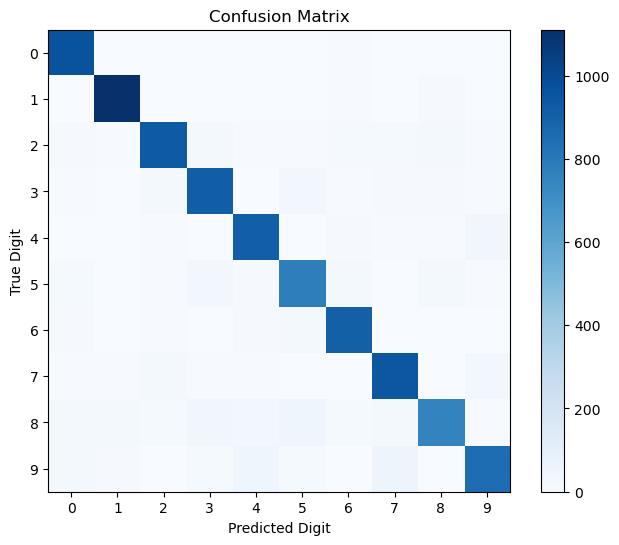

In [5]:
# 1. Import .py files:
from core.imports import *
from core.data_preprocessing import load_mnist, preprocess_data
from core.custom_confusion_matrix import custom_confusion_matrix
from core.multi_class_perceptron import MultiClassPerceptron
from core.evaluation_functions import evaluate_model, plot_confusion_matrix

# 2. Load and preprocess data:
X, y = load_mnist()
X = preprocess_data(X)

# 3. Split into train/test:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# 4. Train the model:
mcp = MultiClassPerceptron()
mcp.fit(X_train, y_train)

# 5. Evaluate:
cm, acc = evaluate_model(mcp, X_test, y_test)
plot_confusion_matrix(cm)


In [ ]:
from core.imports import *
from core.data_preprocessing import load_mnist, preprocess_data
from core.custom_confusion_matrix import custom_confusion_matrix
from core.multi_class_perceptron import MultiClassPerceptron
from core.evaluation_functions import evaluate_model, plot_confusion_matrix
%matplotlib inline

# 1. Ensure the outputs directory exists
os.makedirs("../outputs", exist_ok=True)

# 2. Generate unique filenames for this run (using a timestamp)
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
log_filename = f"../outputs/run_{timestamp}_log.txt"
img_filename = f"../outputs/run_{timestamp}_confusion_mat.png"

# 3. Redirect stdout to a new log file
with open(log_filename, "w") as f:
    original_stdout = sys.stdout
    sys.stdout = f  # All print statements will go to run_{timestamp}_log.txt

    print("=== Starting a new run ===")
    print(f"Log file: {log_filename}")
    print(f"Image file: {img_filename}")
    

    # -- Load and preprocess data --
    print("=== Loading and Preprocessing Data ===")
    X, y = load_mnist()
    X = preprocess_data(X)

    # -- Split into train/test --
    print("=== Splitting Data ===")
    X_train, X_test = X[:60000], X[60000:]
    y_train, y_test = y[:60000], y[60000:]

    # -- Train the model --
    print("=== Training MultiClassPerceptron ===")
    mcp = MultiClassPerceptron()
    mcp.fit(X_train, y_train)

    # -- Evaluate on test set --
    print("=== Evaluating on Test Set ===")
    cm, acc = evaluate_model(mcp, X_test, y_test)

    # Restore stdout
    sys.stdout = original_stdout

# 4. Plot and save the confusion matrix image
plot_confusion_matrix(cm)         # This displays in the notebook
plt.savefig(img_filename)         # Save to e.g. outputs/run_20230305_123456_confusion_mat.png
plt.show()                        # Show inline in the notebook

print(f"Run complete. Logs saved to {log_filename} and figure saved to {img_filename}.")
